<a href="https://colab.research.google.com/github/hith3sh/tricalAI/blob/main/EN3150_A03_part2_hithesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **EN3150 Assignment 03 part 02**

## Importing dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D
import matplotlib.pyplot as plt

## loading dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 13s 0us/step


## Loading ResNet and fine tuning

In [3]:
# loading restnet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False


94765736/94765736 [==============================] - 5s 0us/step


In [16]:
# adding customized layers on top of the pre-trained model
model = Sequential()
model.add(base_model)
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 dense_11 (Dense)            (None, 1, 1, 64)          131136    
                                                                 
 dense_12 (Dense)            (None, 1, 1, 64)          4160      
                                                                 
 dense_13 (Dense)            (None, 1, 1, 10)          650       
                                                                 
Total params: 23723658 (90.50 MB)
Trainable params: 135946 (531.04 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [18]:
# compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [19]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 26s 18ms/step - loss: 2.0692 - accuracy: 0.1034 - val_loss: 1.9874 - val_accuracy: 0.1048
Epoch 2/20
1250/1250 [==============================] - 18s 15ms/step - loss: 1.9040 - accuracy: 0.1059 - val_loss: 1.8732 - val_accuracy: 0.1066
Epoch 3/20
1250/1250 [==============================] - 18s 14ms/step - loss: 1.8455 - accuracy: 0.1073 - val_loss: 1.8119 - val_accuracy: 0.1065
Epoch 4/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.8021 - accuracy: 0.1075 - val_loss: 1.7668 - val_accuracy: 0.1083
Epoch 5/20
1250/1250 [==============================] - 20s 16ms/step - loss: 1.7766 - accuracy: 0.1081 - val_loss: 1.7749 - val_accuracy: 0.1075
Epoch 6/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.7502 - accuracy: 0.1080 - val_loss: 1.7232 - val_accuracy: 0.1080
Epoch 7/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.7420 - accuracy: 0.1080 - val_loss: 1.7136 -

## Accuracy and loss chart

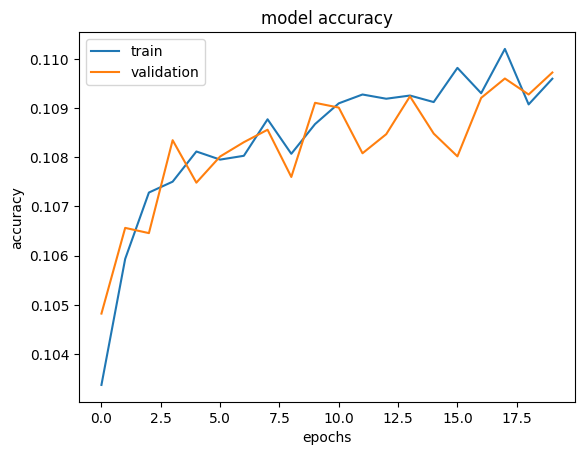

In [20]:
# accuracy chart
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

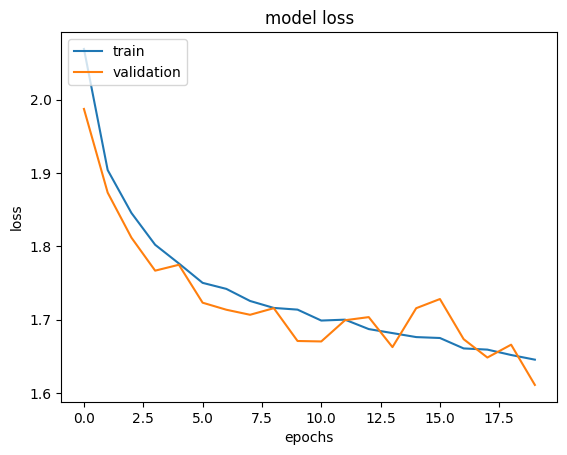

In [21]:
#loss chart
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

## Evaluate on unseen test data and check test accuracy

In [22]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 5s 17ms/step - loss: 1.6112 - accuracy: 0.1098
Test accuracy: 0.10975342988967896
